### 加载需要的库文件

In [1]:
from feature_coder import Decoder, Encoder
from Bi_LSTM import device
from Data_Set import data_set
from torch.utils.data import DataLoader
import torch.nn as nn 
from tqdm import tqdm
import torch.optim as optim

---

### 取数据

In [2]:
data = data_set(2,1)
dataloader = DataLoader(data, batch_size=8)
print(len(dataloader))
for item in dataloader:
  print(item.shape)
  break

225
torch.Size([8, 23, 512])


### 训练

In [3]:
# 初始化模型（放到GPU上）
device = device
encoder = Encoder().to(device)
decoder = Decoder().to(device)

In [4]:
# 训练前准备
epoch_num = 2
loss_fn = nn.MSELoss()
loss_ = []
optimizer_1 = optim.Adam(encoder.parameters(), lr=0.001)
optimizer_2 = optim.Adam(decoder.parameters(), lr=0.001)

In [5]:
for epoch in range(epoch_num):
    print("epoch:\t", epoch+1)
    with tqdm(total=len(dataloader)) as pbar:
        for item in dataloader:
            item = item.permute(0, 2, 1)
            item = item.to(device)
            feature = encoder(item)
            out = decoder(feature)
            loss = loss_fn(item, out)
            optimizer_1.zero_grad()      # 清空之前的梯度
            optimizer_2.zero_grad()
            loss.backward()              # 梯度回传
            optimizer_1.step()           # 更新参数
            optimizer_2.step()
            loss_.append(loss)
            pbar.update(1)
    

epoch:	 1


100%|██████████| 225/225 [02:26<00:00,  1.54it/s]


epoch:	 2


100%|██████████| 225/225 [02:27<00:00,  1.53it/s]


### 损失图

In [6]:
import torch
loss_ = torch.tensor(loss_)
loss_ = loss_.to('cpu')
print(loss_)

tensor([0.6997, 0.8644, 0.9677, 0.4359, 0.3206, 0.2783, 0.3210, 0.3298, 0.7313,
        0.6837, 0.5536, 0.4772, 0.6044, 0.4325, 0.4406, 0.4057, 0.5896, 0.9223,
        0.8934, 0.5945, 0.7945, 1.0029, 0.5834, 0.6492, 0.7534, 0.7152, 0.8590,
        1.5534, 0.7955, 0.8098, 0.8549, 0.8985, 1.2577, 0.9271, 1.1091, 0.9982,
        0.9739, 1.1099, 1.0445, 1.1757, 1.3339, 1.1281, 1.4455, 1.3145, 1.9506,
        1.3555, 1.4374, 1.4302, 1.3090, 1.8121, 1.4181, 1.4345, 1.7777, 1.7931,
        1.4248, 1.4538, 1.6521, 1.7501, 1.4312, 1.3560, 1.4381, 1.7245, 1.6795,
        1.8675, 1.5399, 1.8864, 1.4406, 1.7735, 1.6268, 1.5513, 1.8670, 1.5591,
        1.7518, 1.7730, 1.9331, 1.8231, 2.3065, 1.7345, 2.0600, 1.7252, 1.5682,
        1.7023, 2.2698, 2.0185, 2.2695, 1.7957, 2.2061, 1.8545, 2.0937, 1.7892,
        2.2263, 1.7916, 2.1123, 1.7195, 2.4610, 1.9071, 2.0494, 2.0491, 1.5185,
        2.7057, 2.4124, 2.0733, 1.9178, 2.3133, 1.7979, 1.5465, 1.6438, 2.5025,
        1.9031, 1.0993, 0.9730, 0.7736, 

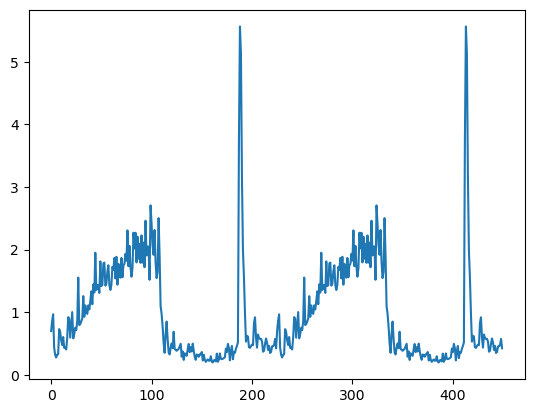

In [7]:
import matplotlib.pyplot as plt
plt.plot(loss_)
plt.show()

## 测试